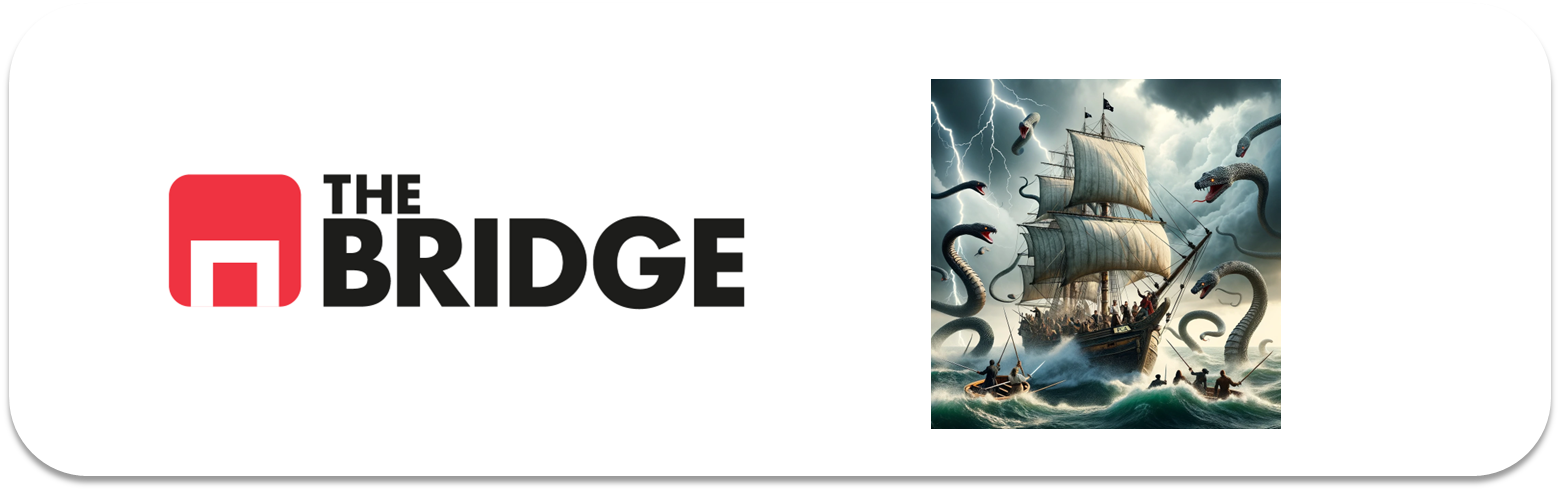

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [23]:
import toolbox_ML as tb
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, recall_score
from sklearn.feature_selection import SelectKBest, f_classif
from scipy import stats


### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [24]:
df = pd.read_csv("./data/credit_npo.csv")
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [26]:
df_back = df.copy()

In [27]:
df.dropna(axis=0, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

In [29]:
columns =["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfOpenCreditLinesAndLoans", 
    "NumberOfTimes90DaysLate", "NumberRealEstateLoansOrLines", 
    "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfDependents"]

for column in columns:
    print(f"Valores unicos en {column}: {df[column].value_counts()}")

Valores unicos en NumberOfTime30-59DaysPastDueNotWorse: NumberOfTime30-59DaysPastDueNotWorse
0     9818
1     1354
2      397
3      127
4       64
5       23
6       20
98      10
8        2
7        1
Name: count, dtype: int64
Valores unicos en NumberOfOpenCreditLinesAndLoans: NumberOfOpenCreditLinesAndLoans
7     1110
6     1031
8     1009
9      965
5      963
4      848
10     765
11     719
3      638
12     574
13     454
2      445
14     365
15     338
1      307
16     236
17     216
18     151
19     129
20     118
0      112
21      62
22      61
23      39
24      38
25      30
26      19
27      16
28      13
29      10
30      10
31       7
33       4
32       3
34       2
35       2
48       1
41       1
49       1
43       1
36       1
38       1
40       1
Name: count, dtype: int64
Valores unicos en NumberOfTimes90DaysLate: NumberOfTimes90DaysLate
0     11156
1       394
2       142
3        54
4        31
5        14
98       10
6         6
8         3
7         3
10

In [30]:
tb.describe_df(df)

,COL_N,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,DATA_TYPE,int64,float64,int64,int64,float64,float64,int64,int64,int64,int64,float64
1,MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,UNIQUE_VALUES,2,10314,78,10,11472,4167,43,13,16,8,10
3,CARDIN (%),0.02,87.29,0.66,0.08,97.09,35.27,0.36,0.11,0.14,0.07,0.08


*Vamos a categorizar las varibales NumerOf.. que tengan la mayoría de valores distribuidos entre 1 o 2 valores*
*Dejamos tal cual NumberOfOpenCreditLinesAndLoans y NumberRealEstateLoansOrLines de momento, por si aportara a la predicción*

In [31]:
#categorizar la variable NumberOfTime30-59DaysPastDueNotWorse en 3 categorías:
df["NumberOfTime30-59_modif"] = np.where(df["NumberOfTime30-59DaysPastDueNotWorse"] == 0, 0, 1) #agrupamos en 0: 0 días de retramos y 1: 1 o más días
df["NumberOfTime30-59_modif"].value_counts()

NumberOfTime30-59_modif
0    9818
1    1998
Name: count, dtype: int64

In [32]:
#Categorizar la varibale NumberOfTimes90DaysLate en 2 categorías:
df["NumberOfTimes90DaysLate_modif"] = np.where(df["NumberOfTimes90DaysLate"] == 0, 0, 1) #agrupamos en 0: 0 días de retramos y 1: 1 o más días
df["NumberOfTimes90DaysLate_modif"].value_counts()

NumberOfTimes90DaysLate_modif
0    11156
1      660
Name: count, dtype: int64

In [33]:
#Categorizar la variable NumberOfTime60-89DaysPastDueNotWorse en 2 categorías:
df["NumberOfTime60-89_modif"] = np.where(df["NumberOfTime60-89DaysPastDueNotWorse"] == 0, 0, 1) #agrupamos en 0: 0 días de retramos y 1: 1 o más días
df["NumberOfTime60-89_modif"].value_counts()

NumberOfTime60-89_modif
0    11206
1      610
Name: count, dtype: int64

In [34]:
#Categorizar la variable NumberOfDependents en 2 categorías (0: 0 hijos / 1: tiene hijos)
df["NumberOfDependents_modif"] = np.where(df["NumberOfDependents"] == 0, 0, 1) 
df["NumberOfDependents_modif"].value_counts()

NumberOfDependents_modif
0    6413
1    5403
Name: count, dtype: int64

##### Split

In [35]:
target = "SeriousDlqin2yrs"
features_removed = ['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']
df.drop(columns=features_removed, axis=1, inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   DebtRatio                             11816 non-null  float64
 4   MonthlyIncome                         11816 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 6   NumberRealEstateLoansOrLines          11816 non-null  int64  
 7   NumberOfTime30-59_modif               11816 non-null  int32  
 8   NumberOfTimes90DaysLate_modif         11816 non-null  int32  
 9   NumberOfTime60-89_modif               11816 non-null  int32  
 10  NumberOfDependents_modif              11816 non-null  int32  
dtypes: float64(3), int32

In [37]:
train_set, test_set = train_test_split(df, test_size=0.2, stratify=df[target], random_state=42 )

##### Mini EDA:

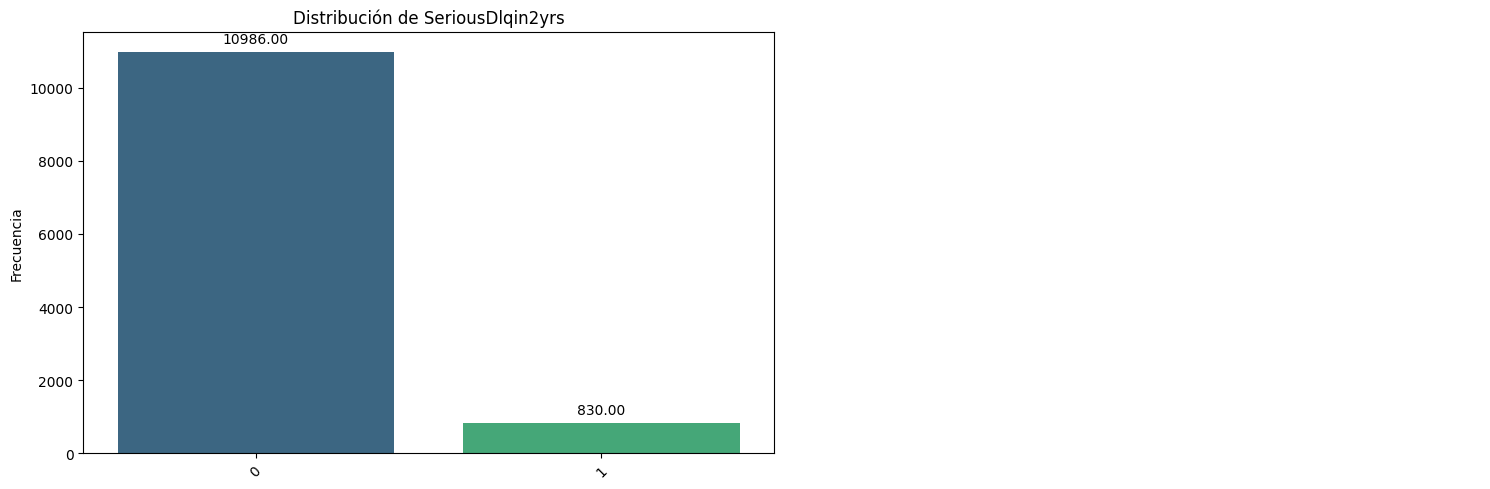

In [38]:
bt.pinta_distribucion_categoricas(df,[target], mostrar_valores= True)

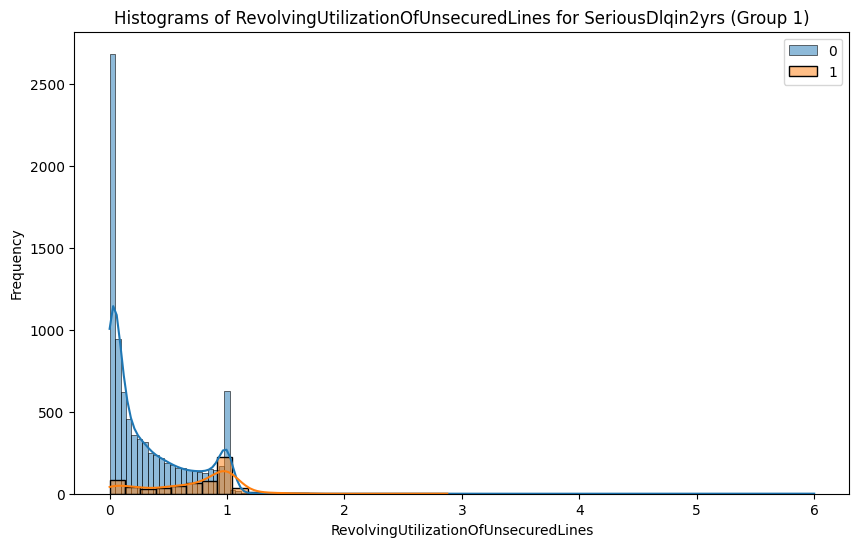

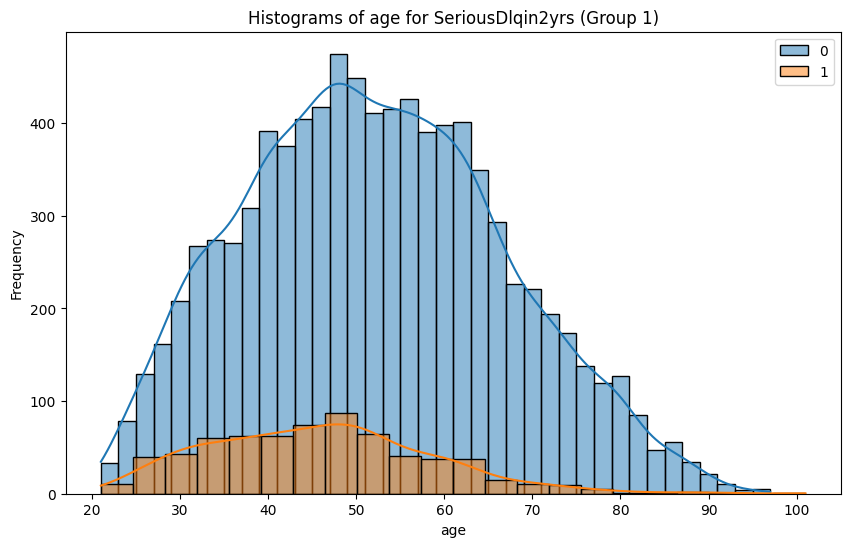

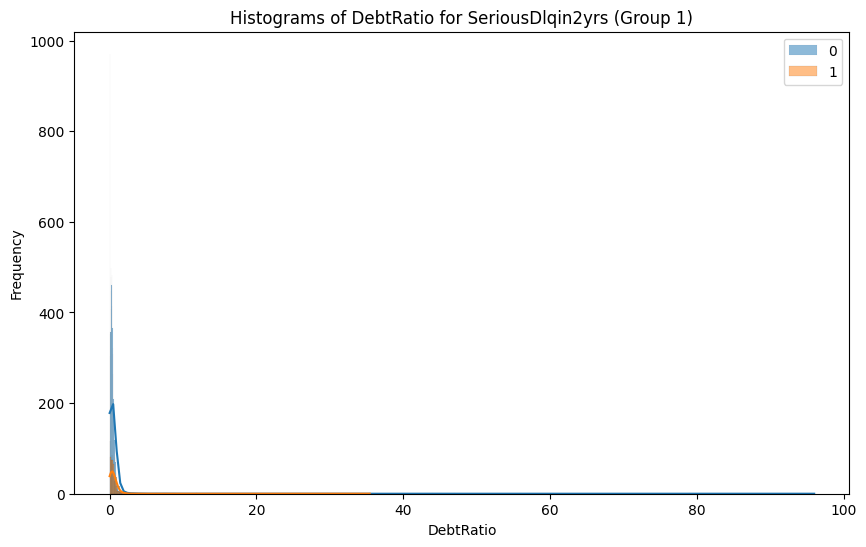

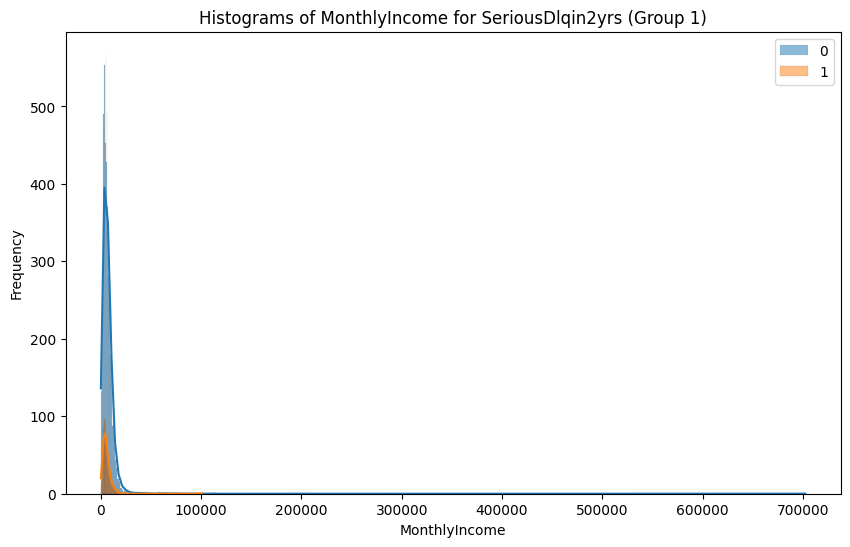

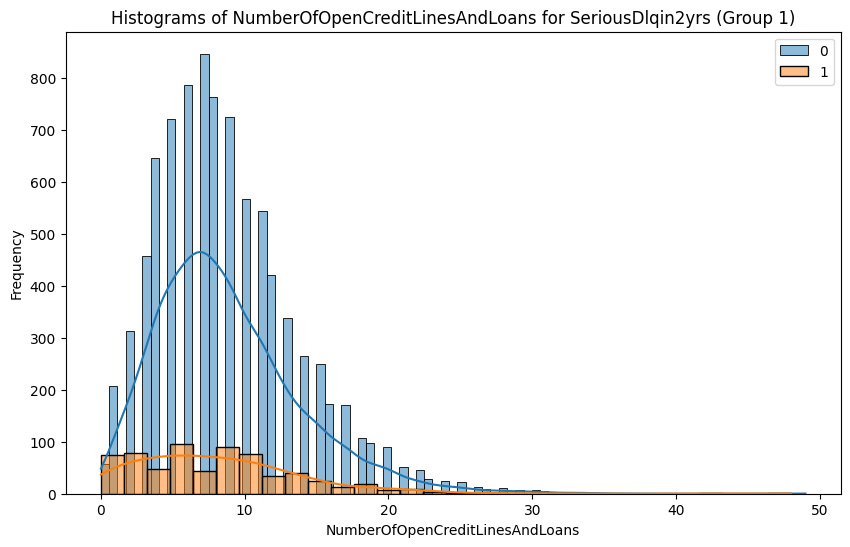

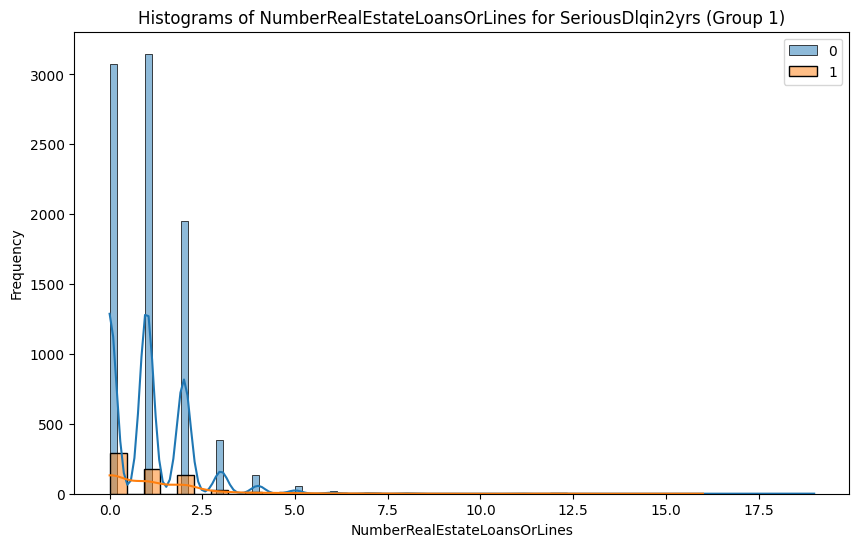

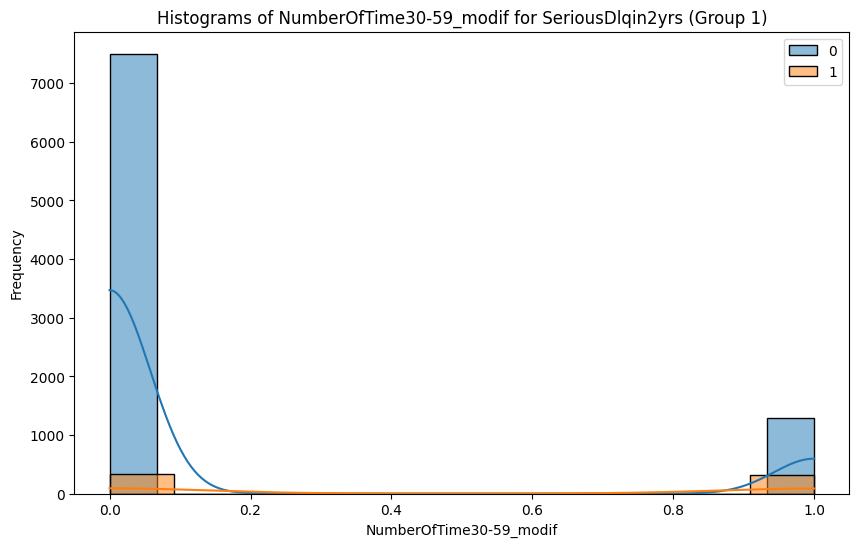

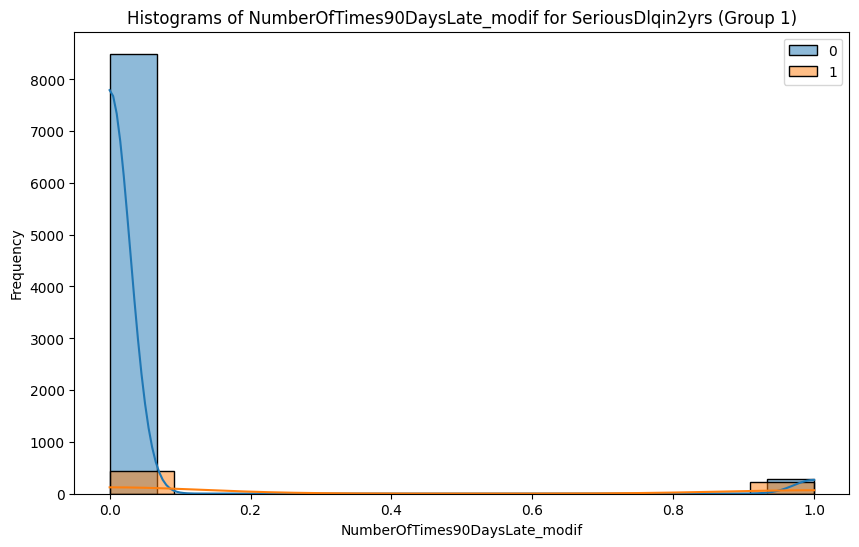

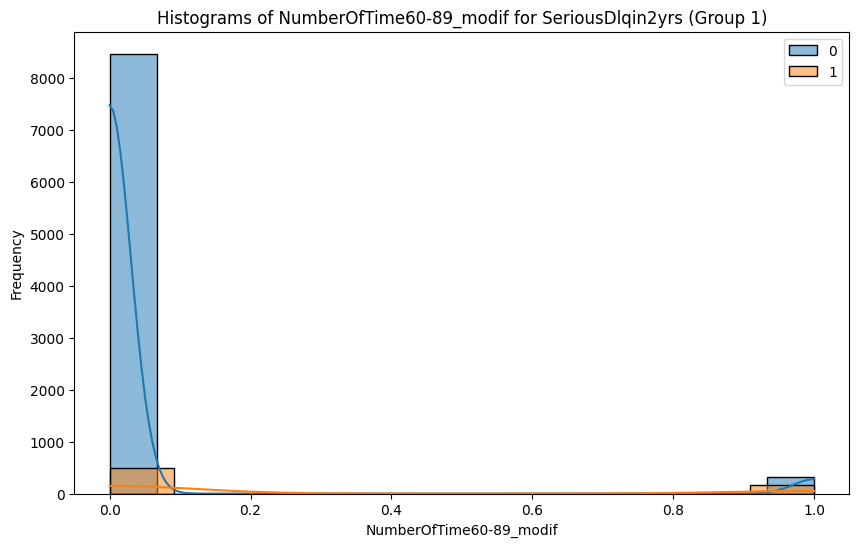

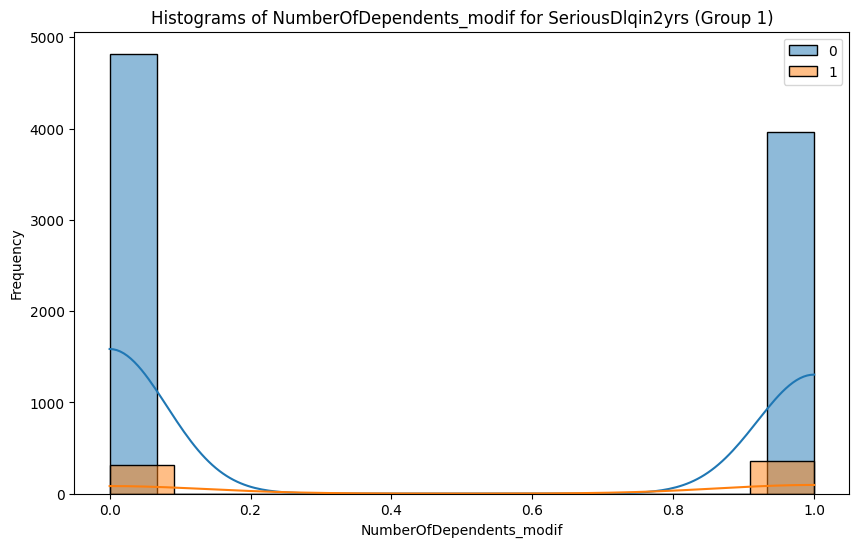

In [39]:
for col in train_set.columns:
    if col != target:
        bt.plot_grouped_histograms(train_set, target, col, group_size = 2)

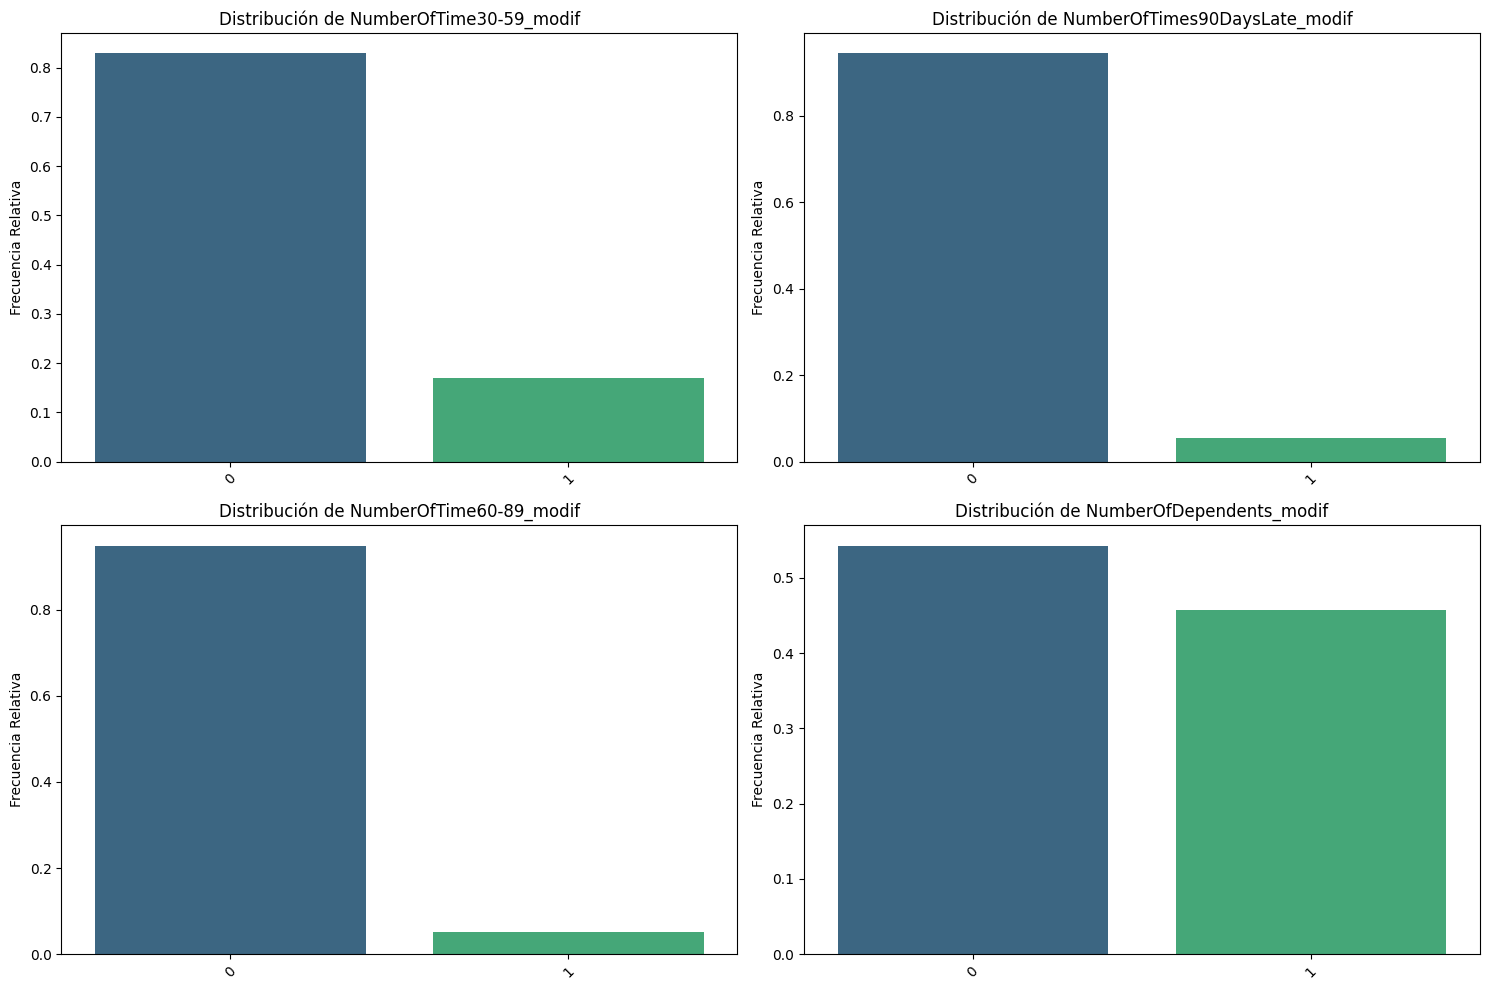

In [40]:
#Vemos la distribución de las categóricas según el target:
bt.pinta_distribucion_categoricas(train_set, ['NumberOfTime30-59_modif', 'NumberOfTimes90DaysLate_modif', 'NumberOfTime60-89_modif', 'NumberOfDependents_modif'], relativa=True)

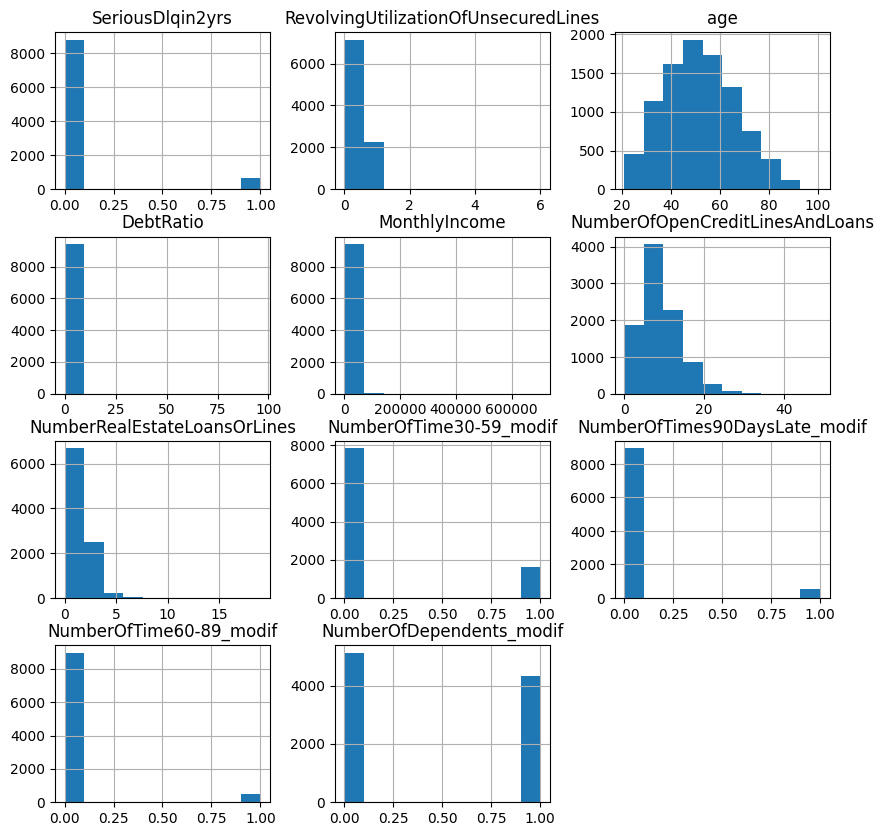

In [41]:
train_set.hist(figsize=(10,10));

In [42]:
matriz_corr = train_set.corr()
serie_corr = np.abs(matriz_corr[target])
serie_corr.sort_values(ascending=False)

SeriousDlqin2yrs                        1.000000
NumberOfTimes90DaysLate_modif           0.353079
RevolvingUtilizationOfUnsecuredLines    0.277475
NumberOfTime60-89_modif                 0.258795
NumberOfTime30-59_modif                 0.233074
age                                     0.105251
NumberOfDependents_modif                0.042697
NumberOfOpenCreditLinesAndLoans         0.033514
MonthlyIncome                           0.025449
NumberRealEstateLoansOrLines            0.005770
DebtRatio                               0.000089
Name: SeriousDlqin2yrs, dtype: float64

In [43]:
matriz_cov = train_set.cov()
serie_cov = np.abs(matriz_cov[target])
serie_cov.sort_values(ascending=False)

MonthlyIncome                           83.028944
age                                      0.392272
SeriousDlqin2yrs                         0.065322
NumberOfOpenCreditLinesAndLoans          0.043842
RevolvingUtilizationOfUnsecuredLines     0.026058
NumberOfTime30-59_modif                  0.022406
NumberOfTimes90DaysLate_modif            0.020577
NumberOfTime60-89_modif                  0.014594
NumberOfDependents_modif                 0.005437
NumberRealEstateLoansOrLines             0.001705
DebtRatio                                0.000061
Name: SeriousDlqin2yrs, dtype: float64

<Axes: >

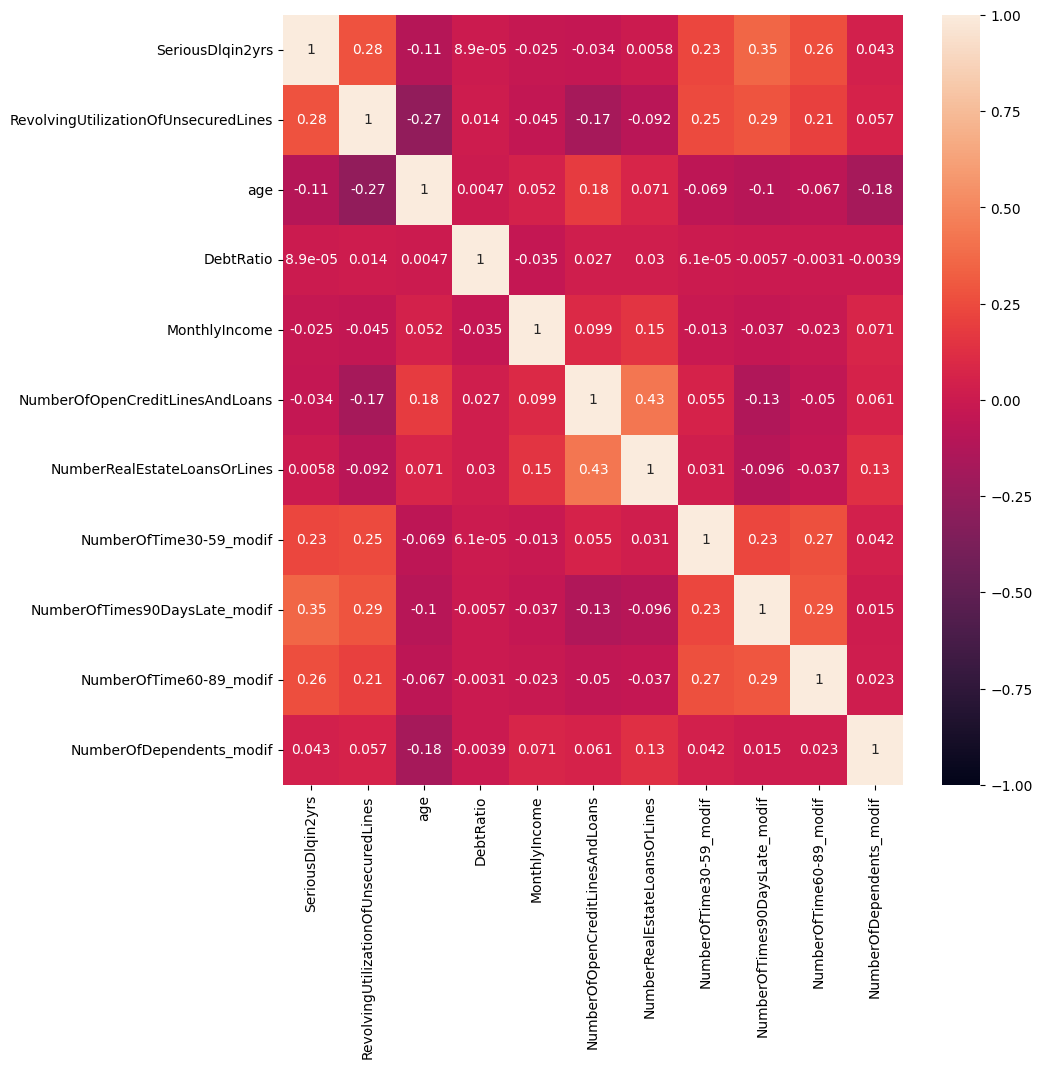

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(matriz_corr, annot=True, vmin=-1, vmax=1)

##### Filtro por correlación y covarianza

In [45]:
umbral_corr = 0.1
umbral_cov = 0.022

serie_corr_filtro = serie_corr[serie_corr >= umbral_corr].index.to_list()
serie_corr_filtro.remove(target)
serie_corr_filtro

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59_modif',
 'NumberOfTimes90DaysLate_modif',
 'NumberOfTime60-89_modif']

In [46]:
serie_cov_filtro = serie_cov[serie_cov >= umbral_cov].index.to_list()
serie_cov_filtro.remove(target)
serie_cov_filtro

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTime30-59_modif']

In [47]:
features_corr_cov = list(set(serie_corr_filtro) & (set(serie_cov_filtro)))
features_corr_cov

['age', 'RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59_modif']

##### Filtro por Mutual Information

In [48]:
from sklearn.metrics import mutual_info_score

In [49]:
train_set.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberRealEstateLoansOrLines', 'NumberOfTime30-59_modif',
       'NumberOfTimes90DaysLate_modif', 'NumberOfTime60-89_modif',
       'NumberOfDependents_modif'],
      dtype='object')

In [50]:
features_cat = ['NumberOfTime30-59_modif',
       'NumberOfTimes90DaysLate_modif', 'NumberOfTime60-89_modif',
       'NumberOfDependents_modif']
       
for feature in features_cat:
    print(f"MI({feature};{target}):", mutual_info_score(train_set[feature],train_set[target]))

MI(NumberOfTime30-59_modif;SeriousDlqin2yrs): 0.020831100086090043
MI(NumberOfTimes90DaysLate_modif;SeriousDlqin2yrs): 0.03315981105348048
MI(NumberOfTime60-89_modif;SeriousDlqin2yrs): 0.019220687427717945
MI(NumberOfDependents_modif;SeriousDlqin2yrs): 0.0009074541147513493


In [51]:
#establecemos umbral en 0.19
features_mi = ["NumberOfTime30-59_modif", "NumberOfTimes90DaysLate_modif","NumberOfTime60-89_modif" ]

##### Filtrado por SlectKbest - ANOVA

In [52]:
selector = SelectKBest(f_classif, k=5)
X_train_kbest = train_set.drop([target], axis=1)
y_train_kbest = train_set[target]

x_data_kbest = selector.fit_transform(X_train_kbest, y_train_kbest)

X_train_kbest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
X_train_kbest


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59_modif,NumberOfTimes90DaysLate_modif,NumberOfTime60-89_modif
0,0.039187,61.0,0.0,0.0,0.0
1,0.919317,41.0,0.0,0.0,0.0
2,0.253718,49.0,0.0,0.0,0.0
3,0.249462,26.0,0.0,0.0,0.0
4,0.224520,76.0,0.0,0.0,0.0
...,...,...,...,...,...
9447,0.174437,61.0,0.0,0.0,0.0
9448,0.039651,64.0,0.0,0.0,0.0
9449,1.000000,29.0,0.0,0.0,0.0
9450,0.945805,51.0,1.0,0.0,0.0


In [53]:
features_ANOVA = X_train_kbest.columns.to_list()
features_ANOVA #incluye las categóricas seleccionadas en el paso anterior

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59_modif',
 'NumberOfTimes90DaysLate_modif',
 'NumberOfTime60-89_modif']

##### Usando un modelo intermedio 

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

rf_selector = RandomForestClassifier(random_state= 42)
selector_model = SelectFromModel(estimator = rf_selector, threshold= "median")

X_train_model = train_set.drop([target], axis=1)
y_train_model = train_set[target]
rf_selector.fit(X_train_model, y_train_model)

RandomForestClassifier(random_state=42)

In [55]:
rf_selector.feature_importances_[rf_selector.feature_importances_ > rf_selector.feature_importances_.mean()]

array([0.20217578, 0.13040863, 0.17276769, 0.16466931, 0.1053806 ])

In [56]:
selector_model.fit(X_train_model, y_train_model)

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                threshold='median')

In [57]:
features_model_rf = selector_model.get_feature_names_out()
features_model_rf = features_model_rf.tolist()
features_model_rf

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans']

##### Empleando RFE

In [58]:
from sklearn.feature_selection import RFE

X_train_rfe = train_set.drop([target], axis=1)
features = X_train_rfe.columns.to_list()
y_train_rfe = train_set[target]

rf_RFE = RandomForestClassifier(random_state= 42) 

rfe = RFE(estimator = rf_RFE,
          n_features_to_select= 5, 
          step = 1) 

rfe.fit(X_train_rfe, y_train_rfe)
print(rfe.ranking_)
df_features_rfe = pd.DataFrame(rfe.ranking_, columns= ["ranking"], index = features).sort_values("ranking")
df_features_rfe


[1 1 1 1 1 3 5 2 4 6]


,ranking
RevolvingUtilizationOfUnsecuredLines,1
age,1
DebtRatio,1
MonthlyIncome,1
NumberOfOpenCreditLinesAndLoans,1
NumberOfTimes90DaysLate_modif,2
NumberRealEstateLoansOrLines,3
NumberOfTime60-89_modif,4
NumberOfTime30-59_modif,5
NumberOfDependents_modif,6


In [59]:
features_rfe = df_features_rfe[df_features_rfe["ranking"] ==1]
features_rfe = features_rfe.index.to_list()
features_rfe

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans']

##### Empleando SFS

In [60]:
from sklearn.feature_selection import SequentialFeatureSelector

X_train_sfs = train_set.drop([target], axis=1)
y_train_sfs = train_set[target]

rf_SFS = RandomForestClassifier(random_state = 42)

sfs_forward = SequentialFeatureSelector(rf_SFS,
                                        n_features_to_select = 5,
                                        cv = 4,
                                        scoring = "balanced_accuracy")


sfs_forward.fit(X_train_sfs, y_train_sfs)

SequentialFeatureSelector(cv=4,
                          estimator=RandomForestClassifier(random_state=42),
                          n_features_to_select=5, scoring='balanced_accuracy')

In [61]:
print("Features seleccionadas por SFS:", sfs_forward.get_feature_names_out())

Features seleccionadas por SFS: ['RevolvingUtilizationOfUnsecuredLines' 'NumberRealEstateLoansOrLines'
 'NumberOfTime30-59_modif' 'NumberOfTimes90DaysLate_modif'
 'NumberOfDependents_modif']


In [62]:
features_sfs = sfs_forward.get_feature_names_out()
features_sfs = features_sfs.tolist()
features_sfs

['RevolvingUtilizationOfUnsecuredLines',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime30-59_modif',
 'NumberOfTimes90DaysLate_modif',
 'NumberOfDependents_modif']

##### Entrenamiento de modelos

In [63]:
#creamos un diccionario con cada una de las listas de features:
features_dict = {"Mutual Information Feat." : features_mi,
                 "ANOVA-SelectKBest Feat." : features_ANOVA,
                 "Modelo Intermedio (RF)." : features_model_rf,
                 "RFE Feat." : features_rfe,
                 "SFS Feat.": features_sfs}
features_dict

{'Mutual Information Feat.': ['NumberOfTime30-59_modif',
  'NumberOfTimes90DaysLate_modif',
  'NumberOfTime60-89_modif'],
 'ANOVA-SelectKBest Feat.': ['RevolvingUtilizationOfUnsecuredLines',
  'age',
  'NumberOfTime30-59_modif',
  'NumberOfTimes90DaysLate_modif',
  'NumberOfTime60-89_modif'],
 'Modelo Intermedio (RF).': ['RevolvingUtilizationOfUnsecuredLines',
  'age',
  'DebtRatio',
  'MonthlyIncome',
  'NumberOfOpenCreditLinesAndLoans'],
 'RFE Feat.': ['RevolvingUtilizationOfUnsecuredLines',
  'age',
  'DebtRatio',
  'MonthlyIncome',
  'NumberOfOpenCreditLinesAndLoans'],
 'SFS Feat.': ['RevolvingUtilizationOfUnsecuredLines',
  'NumberRealEstateLoansOrLines',
  'NumberOfTime30-59_modif',
  'NumberOfTimes90DaysLate_modif',
  'NumberOfDependents_modif']}

In [64]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

In [65]:
#Definimos ahora otro diccionario para los modelos:
modelos = {"RandomForestClassifier" : RandomForestClassifier(max_depth=10, class_weight="balanced", random_state=42),
           "Logistic Regresssion" : LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42),
           "LGBMClassifier" : LGBMClassifier(max_depth=10, is_unbalance=True, random_state=42)}
modelos

{'RandomForestClassifier': RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42),
 'Logistic Regresssion': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
 'LGBMClassifier': LGBMClassifier(is_unbalance=True, max_depth=10, random_state=42)}

In [66]:
#Vamos a instanciar los juegos de X e y para train y test:
X_train = train_set.drop(columns=target)
X_test = test_set.drop(columns=target)
y_train = train_set[target]
y_test = test_set[target]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9452, 10)
(9452,)
(2364, 10)
(2364,)


In [67]:
scoring = []

for nombre_lista, lista_features in features_dict.items():
    X_train_features_select = X_train[lista_features]

    for nombre_modelo, modelo in modelos.items():
        recall_medio = np.mean(cross_val_score(modelo, X_train_features_select, y_train, cv=5, scoring='balanced_accuracy'))
        scoring.append({
            "Features" : nombre_lista,
            "modelo": nombre_modelo,
            "cv_recall_medio" : recall_medio
        })

df_scoring = pd.DataFrame(scoring)

[LightGBM] [Info] Number of positive: 531, number of negative: 7030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6
[LightGBM] [Info] Number of data points in the train set: 7561, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.070229 -> initscore=-2.583180
[LightGBM] [Info] Start training from score -2.583180
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [68]:
df_scoring

,Features,modelo,cv_recall_medio
0,Mutual Information Feat.,RandomForestClassifier,0.742867
1,Mutual Information Feat.,Logistic Regresssion,0.742867
2,Mutual Information Feat.,LGBMClassifier,0.742867
3,ANOVA-SelectKBest Feat.,RandomForestClassifier,0.686888
4,ANOVA-SelectKBest Feat.,Logistic Regresssion,0.755392
5,ANOVA-SelectKBest Feat.,LGBMClassifier,0.728435
6,Modelo Intermedio (RF).,RandomForestClassifier,0.674193
7,Modelo Intermedio (RF).,Logistic Regresssion,0.730911
8,Modelo Intermedio (RF).,LGBMClassifier,0.673202
9,RFE Feat.,RandomForestClassifier,0.674193


In [69]:
df_scoring["cv_recall_medio"].max() #vemos el mejor resultado

0.7553924411392151

In [70]:
df_scoring.iloc[4]

Features           ANOVA-SelectKBest Feat.
modelo                Logistic Regresssion
cv_recall_medio                   0.755392
Name: 4, dtype: object

##### Optimización de hiperparámetros y validación con test

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
lg_parametros = {"penalty": ['none', 'elasticnet', "l1", "l2"],
                 "C": [1, 10, 100, 1000],
                 "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                 "max_iter": [1000, 10000]}

modelo_lg = LogisticRegression()

lg_grid = GridSearchCV(estimator=modelo_lg,
                       param_grid=lg_parametros,
                        cv=5,
                        scoring= "balanced_accuracy",
                        verbose= 0)

In [73]:
lg_grid.fit(X_train[features_ANOVA], y_train)

c:\Users\bnove\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
640 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\bnove\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\bnove\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\bnove\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100, 1000], 'max_iter': [1000, 10000],
                         'penalty': ['none', 'elasticnet', 'l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='balanced_accuracy')

In [74]:
best_model = lg_grid.best_params_

{'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}

In [75]:
lg_grid.best_score_

0.5876291213309048

In [76]:
#probamos a entrenar con todas las features:
y_pred = lg_grid.predict(X_test[features_ANOVA])
test_score = recall_score(y_pred, y_test, average="macro")
test_score

0.7041142344665228

### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.